#### Importing necessary Libaries 

In [ ]:
import numpy as np # for working with arrays,linear algebra, matrices 
import pandas as pd # for data manipulation 
import nltk # for static nlp 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re #raise exception if occurs
from textblob import TextBlob
from wordcloud import WordCloud # highlight popular words for analysis 
import seaborn as sns # for data visualization 
import matplotlib.pyplot as plt # for data visualization 
import cufflinks as cf #links matplotlib with pandas  
#to display plots inside notebook, basically for offline graphics 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
# plotly defines fundamental classes 
import plotly.graph_objs as go 
from plotly.subplots import make_subplots 

import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)




In [ ]:
df = pd.read_csv("amazon.csv")


#### Data manipulation 

In [ ]:
df = df.sort_values("wilson_lower_bound", ascending=False)
df.drop('Unnamed: 0', inplace= True, axis= 1)
df.head()

- **sort** : sorts the value of wilson_lower_bound with highest value at top 
- **drop** : deletes the column named `Unnamed: 0 ` 
- **inplace=True** : Make modification in original dataset 

#### Handling Missing values 

In [ ]:
# Function to analyze missing values in a DataFrame
def missing_values_analysis(df):
    # Identify columns with missing values
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    
    # Count missing values and calculate the ratio
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    
    # Create a DataFrame to display missing values and ratios
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing values', 'Ratio'])
    
    return missing_df



#### Function to check and summarize DataFrame information


In [ ]:
# Function to check and summarize DataFrame information
def check_dataframe(df, head=5, tail=5):
    # Display shape of the DataFrame
    print("Shape".center(82, '~'))
    print("Rows: {}".format(df.shape[0]))
    print("Columns: {}".format(df.shape[1]))
    
    # Display data types of columns
    print("Types".center(82, '~'))
    print(df.dtypes)
    
    # Display missing values analysis
    print("".center(82, '~'))
    print(missing_values_analysis(df))
    
    # Display number of duplicated values
    print("Duplicated Values".center(83, '~'))
    print(df.duplicated().sum())
    
    # Display quantiles of the DataFrame
    print("Quantiles".center(82, '~'))
    print(df.describe().T)  # Use df.describe() instead of df.quantile()

# Example usage
check_dataframe(df)


checking a particular row comment

In [ ]:
review_example = df.reviewText[2031]
review_example

#### Cleaning the particular row comment 

In [ ]:
# removing all the puntucation from particular comment 
review_example = re.sub("[^a-zA-Z]","", review_example)

# converting all to lowercase and splitting them in new line 
review_example = review_example.lower().split()

review_example

#### Applying the same changes to the whole dataset 


In [ ]:
rt = lambda x: re.sub("[^a-zA-Z]", ' ', str(x))
df["reviewText"] = df["reviewText"].map(rt)
df["reviewText"] = df["reviewText"].str.lower()
df.head()


#### Performing sentiment analysis 

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Using TextBlob for polarity and subjectivity
df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda text: pd.Series(TextBlob(str(text)).sentiment))

# Using VaderSentiment for sentiment analysis
for index, row in df['reviewText'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(str(row))
    
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    
    if neg > pos: 
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg: 
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "Neutral"


In [ ]:
df[df["sentiment"] ==  "Positive"].sort_values("wilson_lower_bound", ascending = False).head()

#### categorize data into positive neagative and neutral 


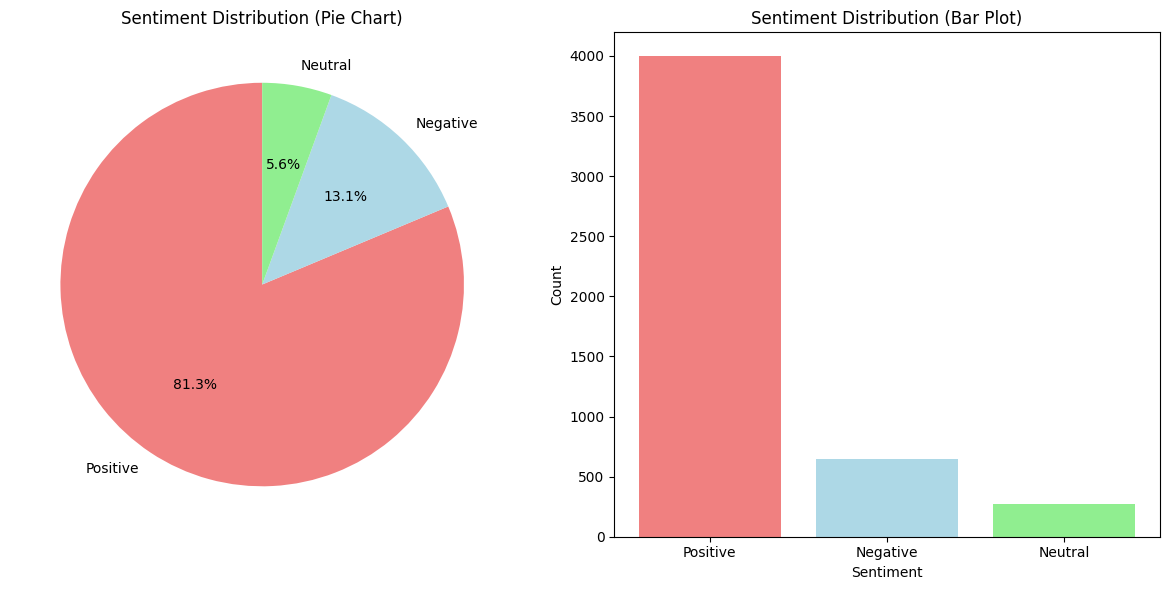

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to summarize a categorical variable in a DataFrame
def categorical_variable_summary(df, variable_name):
    """
    Summarizes a categorical variable in a DataFrame.catagorize data into positive neagative and neutral 


    Parameters:
    - df: DataFrame
    - variable_name: str
        Name of the categorical variable to be summarized.

    Returns:
    - summary: DataFrame
        DataFrame containing counts and percentages of unique values in the specified categorical variable.
    """
    summary = df[variable_name].value_counts().reset_index()
    summary.columns = [variable_name, 'Count']
    summary['Percentage'] = (summary['Count'] / df.shape[0]) * 100
    return summary


# Example usage:
sentiment_summary = categorical_variable_summary(df, 'sentiment')
plot_combined_chart(sentiment_summary)
